In [145]:
import os 
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
diab=pd.read_csv("C:\\Users\\riama\\Desktop\\Machine_learning\\diabetes.csv")

In [147]:
diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [148]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [149]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [150]:
def univar(data,y):
    unique_count= data[y].nunique()
    missing= data[y].isnull().sum()
    unique_cat= list(data[y].unique())
    f1=pd.DataFrame(data[y].value_counts())
    f1.rename(columns={y:"Count"},inplace=True)
    f2=pd.DataFrame(data[y].value_counts(normalize=True))
    f2.rename(columns={y:"percentage"},inplace=True)
    f2["percentage"]=round(f2["percentage"]*100,2)  #(f2["percentage"]*100).round(2).astype(str)+"%" (if we want to add percentage
                                                    #then we have to convert it to string then will add %symbol)
    ff=pd.concat([f1,f2],axis=1)
    
    myvalue= {"missing":missing,"unique category": unique_cat,"unique_count":unique_count}
    print(f"value count and %\n",ff)
    sns.countplot(data=data,x=y)
    return myvalue

In [151]:
def univar_num(y):
    missing= y.isnull().sum()
    min1=round(y.min(),2)
    max1=round(y.max(),2)
    mean=round(y.mean(),2)
    var=round(y.var(),2)
    std=round(y.std(),2)
    range1=round(max1-min1,2)
    q1= round(y.quantile(.25),2)
    q2=round(y.quantile(.5),2)
    q3=round(y.quantile(.75),2)
    skew=round(y.skew(),2)
    kurt=round(y.kurt(),2)
    myval={"Missing Value":missing,"Minimum value": min1,"Maximum value": max1, "Mean value": mean,"Variance": var,"Standard Deviation": std,"Range": range1,
          "Quantile1":q1,"Quantile2": q2,"Quantile3":q3,"Skewness": skew,"kurtosis":kurt}
    sns.histplot(y)
    plt.show()
    sns.boxplot(data=diab,y=y)
    plt.show()
    return myval

In [152]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

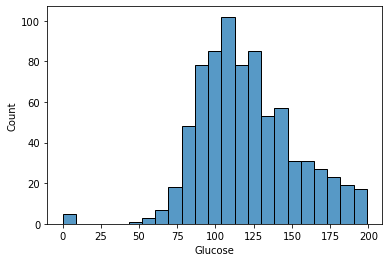

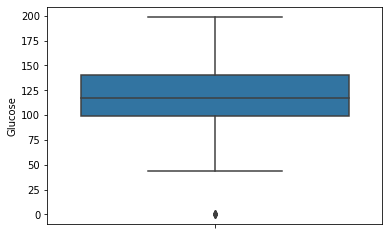

{'Missing Value': 0,
 'Minimum value': 0,
 'Maximum value': 199,
 'Mean value': 120.89,
 'Variance': 1022.25,
 'Standard Deviation': 31.97,
 'Range': 199,
 'Quantile1': 99.0,
 'Quantile2': 117.0,
 'Quantile3': 140.25,
 'Skewness': 0.17,
 'kurtosis': 0.64}

In [153]:
univar_num(diab["Glucose"])

#### Outliers Treatment

In [154]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [155]:
diab.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,76.000,79.00000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,0.000,38.70000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.000,21.80000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.000,21.00000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [156]:
diab["Glucose"].median()

117.0

In [157]:
diab[diab["Glucose"]==0]=117.0  #replaced the 0 with median value of glucose

In [158]:
diab[diab["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [159]:
# diab["Glucose"].replace({0:np.nan})   creating it in missing value thhen will fill the same

In [160]:
diab[["BloodPressure","SkinThickness","Insulin","BMI"]]=diab[["BloodPressure","SkinThickness","Insulin","BMI"]].replace({0:np.nan})

In [161]:
diab.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     370
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [162]:
diab.fillna(diab.median(),inplace=True)
#from sklearn.impute import SimpleImputer
#sm=SimpleImputer(strategy="median")
# df1=sm.fit_transform(df) (gives the result in array hence we are converting it into data frame)
# df2=pd.Dataframe(df1,columns=df.columns)
# df2   (another method for filling the missing values)


In [163]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [164]:
diab.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,4.588542,9.707185,0.000,0.00000,0.00000,0.00000,0.000,0.000,0.000,1.000,3.000,6.0000,9.0000,10.65000,11.000,12.00000,13.0000,14.00000,117.0
Glucose,768.0,121.656250,30.438286,44.000,67.67000,72.34000,75.00000,78.000,80.000,86.700,99.750,117.000,140.2500,167.0000,181.00000,184.000,187.99000,192.3200,196.00000,199.0
BloodPressure,768.0,72.708333,12.581555,24.000,44.00000,50.00000,50.00000,52.000,52.700,58.000,64.000,72.000,80.0000,88.0000,92.00000,94.000,97.98000,104.0000,110.00000,122.0
SkinThickness,768.0,29.677083,11.263347,7.000,10.00000,12.00000,13.00000,13.000,14.350,18.000,25.000,29.000,32.0000,41.0000,45.00000,46.000,47.99000,50.0000,57.32000,117.0
Insulin,768.0,140.752604,86.292210,14.000,27.68000,38.68000,44.01000,48.680,50.350,67.700,120.000,125.000,127.2500,210.0000,293.00000,325.000,369.90000,470.9400,519.90000,846.0
BMI,768.0,33.004297,9.659329,18.200,19.50000,20.40000,21.10000,21.800,22.235,24.000,27.575,32.400,36.6000,42.1300,45.26500,45.732,46.69800,49.4980,55.75900,117.0
DiabetesPedigreeFunction,768.0,1.231120,9.383561,0.078,0.09468,0.11902,0.12701,0.134,0.141,0.165,0.244,0.377,0.6325,0.8963,1.16095,1.224,1.32097,1.4709,2.18683,117.0
Age,768.0,33.816406,13.530838,21.000,21.00000,21.00000,21.00000,21.000,21.000,22.000,24.000,29.000,41.0000,52.0000,59.00000,61.000,63.00000,66.0000,69.33000,117.0
Outcome,768.0,1.108073,9.399716,0.000,0.00000,0.00000,0.00000,0.000,0.000,0.000,0.000,0.000,1.0000,1.0000,1.00000,1.000,1.00000,1.0000,1.00000,117.0


In [200]:
diab_out=diab.apply(outliers)

In [201]:
diab_out.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.912760,3.444315,0.00000,0.000000,0.00000,0.00000,0.000,0.000,0.000,1.000,3.000,6.0000,9.0000,10.65000,11.000,12.00000,13.0000,14.000000,14.00000
Glucose,768.0,121.738750,30.219440,67.67000,67.891100,72.34000,75.00000,78.000,80.000,86.700,99.750,117.000,140.2500,167.0000,181.00000,184.000,187.99000,192.3200,196.000000,196.00000
BloodPressure,768.0,72.717448,12.139438,44.00000,44.000000,50.00000,50.00000,52.000,52.700,58.000,64.000,72.000,80.0000,88.0000,92.00000,94.000,97.98000,104.0000,110.000000,110.00000
SkinThickness,768.0,29.236406,8.687405,10.00000,10.000000,12.00000,13.00000,13.000,14.350,18.000,25.000,29.000,32.0000,41.0000,45.00000,46.000,47.99000,50.0000,56.435600,57.32000
Insulin,768.0,139.649271,79.142371,27.68000,28.564400,38.68000,44.01000,48.680,50.350,67.700,120.000,125.000,127.2500,210.0000,293.00000,325.000,369.90000,470.9400,513.267000,519.90000
BMI,768.0,32.591500,7.009781,19.50000,19.500000,20.40000,21.10000,21.800,22.235,24.000,27.575,32.400,36.6000,42.1300,45.26500,45.732,46.69800,49.4980,55.250470,55.75900
DiabetesPedigreeFunction,768.0,0.483107,0.355272,0.09468,0.095564,0.11902,0.12701,0.134,0.141,0.165,0.244,0.377,0.6325,0.8963,1.16095,1.224,1.32097,1.4709,2.153444,2.18683
Age,768.0,33.486510,12.021286,21.00000,21.000000,21.00000,21.00000,21.000,21.000,22.000,24.000,29.000,41.0000,52.0000,59.00000,61.000,63.00000,66.0000,69.108900,69.33000
Outcome,768.0,0.352865,0.478172,0.00000,0.000000,0.00000,0.00000,0.000,0.000,0.000,0.000,0.000,1.0000,1.0000,1.00000,1.000,1.00000,1.0000,1.000000,1.00000


#### Correlation

<AxesSubplot:>

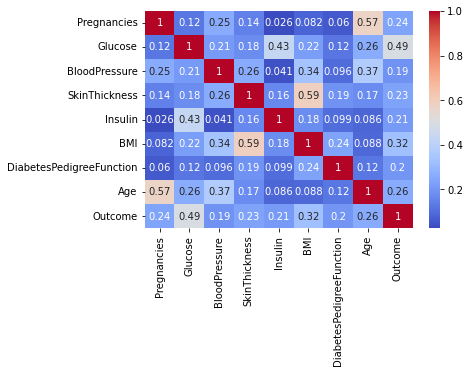

In [202]:
cr=diab_out.corr()
cr1= cr[abs(cr)>.7]
sns.heatmap(cr,annot=True,cmap="coolwarm")

#### Model Development

In [203]:
y=diab_out["Outcome"]
x=diab_out.drop(columns=["Outcome"])

In [173]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [205]:
logR=LogisticRegression(max_iter=10000,random_state=12)  #iteration is necessary
logR.fit(x_train,y_train)

LogisticRegression(max_iter=10000, random_state=12)

In [206]:

print("Train Accuracy:" ,logR.score(x_train,y_train))
print("Test Accuracy:" ,logR.score(x_test,y_test))

Train Accuracy: 0.7746741154562383
Test Accuracy: 0.7662337662337663


In [207]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("Train Accuracy:" ,dt.score(x_train,y_train))
print("Test Accuracy:" ,dt.score(x_test,y_test))

Train Accuracy: 1.0
Test Accuracy: 0.7445887445887446


##### Grid Search Parameters

In [208]:
x_train.shape

(537, 8)

In [209]:
params={
    "criterion":["gini","entropy"],
"max_depth":[3,5,7,9,11],                                 #we can enter parameters as per our 
"min_samples_split":[20,30,50,70,100,120],
"min_samples_leaf":[1,3,5,7,9,12,15,20]}

dtg=DecisionTreeClassifier()

gd_search=GridSearchCV(estimator=dtg,param_grid=params,cv=5,n_jobs=-1,verbose=1,refit=True)#rift:model cv pe run hone ke baad
                                                            #pure data pe bhi run hota hai

gd_search.fit(x_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 12, 15, 20],
                         'min_samples_split': [20, 30, 50, 70, 100, 120]},
             verbose=1)

In [210]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 12,
 'min_samples_split': 30}

In [211]:
dt1=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_leaf=15,min_samples_split=30)
dt1.fit(x_train,y_train)

print("Train Accuracy:" ,dt1.score(x_train,y_train))
print("Test Accuracy:" ,dt1.score(x_test,y_test))

Train Accuracy: 0.7802607076350093
Test Accuracy: 0.7532467532467533


In [212]:
gd_search.best_score_

0.7523018345448251

#### Feature Importance

In [213]:
pd.DataFrame({"Variable": x_train.columns, "Imp":dt1.feature_importances_}).sort_values(by="Imp",ascending=False)

,Variable,Imp
1,Glucose,0.578225
5,BMI,0.170632
7,Age,0.150598
6,DiabetesPedigreeFunction,0.043871
4,Insulin,0.031085
3,SkinThickness,0.023642
0,Pregnancies,0.001947
2,BloodPressure,0.000000


In [214]:
def classification(act,pred,probs):
    ac1=metrics.accuracy_score(act,pred)
    rc1=metrics.recall_score(act,pred)
    pc1=metrics.precision_score(act,pred)
    f1=metrics.f1_score(act,pred)
    roc1=metrics.roc_auc_score(act,pred)
    result={"Accuracy":ac1,"Recall":rc1,"Precission":pc1,"F1score": f1, "AUC": roc1}
    
    fpr,tpr,threshold=metrics.roc_curve(act,probs)
    plt.plot([0,1],[0,1],"k--")  #0,1 are the edges starting from 0 to 1 and k-- is for the line which is coming in graph and 
                                 #k is for black color
    plt.plot(fpr,tpr)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.show()
    return result

In [215]:
pred_train=logR.predict(x_train)
pred_test=logR.predict(x_test)

In [216]:
prob_train_1=logR.predict_proba(x_train)[:,1]
prob_test_1=logR.predict_proba(x_test)[:,1]

In [217]:
pred_test

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1.

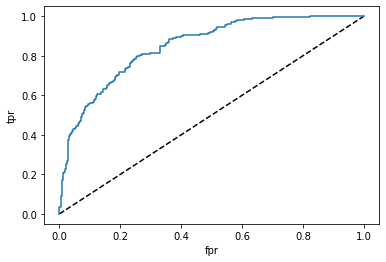

{'Accuracy': 0.7746741154562383,
 'Recall': 0.6071428571428571,
 'Precission': 0.7300613496932515,
 'F1score': 0.6629526462395544,
 'AUC': 0.7390552995391705}

In [218]:
classification(y_train,pred_train,probs=prob_train_1)

In [226]:
new_prob_train=np.where(prob_train_1>=.2,1,0)
new_prob_test=np.where(prob_test_1>=.2,1,0)

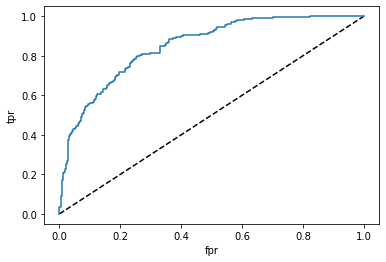

{'Accuracy': 0.6815642458100558,
 'Recall': 0.9030612244897959,
 'Precission': 0.5379939209726444,
 'F1score': 0.6742857142857143,
 'AUC': 0.7286567119516427}

In [227]:
classification(y_train,new_prob_train,probs=prob_train_1)

In [228]:
pd.DataFrame(metrics.confusion_matrix(y_train,new_prob_train),columns=["Pred0","Pred1"],index=["Act_0","Act_1"])

,Pred0,Pred1
Act_0,189,152
Act_1,19,177
